# Logistic Regression

Linear regression works best when predicting continuous values, but what happens if we want to predict something which is categorical? This is where classification models come in. Instead of predicting a value, this type of model will instead predict what category a piece of data falls into. 

One of the simplest types of classification model is logistic regression. Don't be fooled by the name, it is a classification model!

In this workbook we will go through how logistic regression works and how a model is built. We will then look at how we interpret and evaluate our models. 

Again we will be using the college data as our example.

In [3]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

college=pd.read_csv('College_data.csv')
college.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## What is it?

Logistic regression is an example of a classification model which tries to predict what category a piece of data falls into. Typically logistic regression models predict binary outcomes (e.g. yes/no, true/false, etc), if you want to predict more than two outcomes you will need to look into other types of model. 

Logistic Regression is actually built upon Linear Regression (hence why it is called Logistic <i>Regression</i>).

Like with Linear Regression, we can use Logistic Regression to make a prediction, or investigate how important different factors are in determining their category.

## How does it work?

As it is a supervised learning model, Logistic Regression takes as an input some data and what categories they fall into. Using this information, the model will then try and work out the makeup of those categories, i.e. why do these data points belong to that category or label?

Once it has identified this pattern, the model can be used to predict which category a new piece of data falls into. 

For example, imagine we had the outcomes from an exam (pass/fail) and some information about the people sitting it (e.g. hours spent revising, hours slept the night before and what they scored on a previous test). Logistic Regression would then use the given information and try and work out what is important in determining whether someone passed or failed. This model can then be used to predict the outcome of a new student who sits the exam late, or determine which of those factors was most important in predicting if someone will pass an exam.

## Building a model

To demonstrate how Logistic Regression works, let's build a model using our college data. Previously we built a model which predicted garduation rate, this time we will predict if a college is going to be above or below average in terms of their graduation rate:

Before we can build this model, we need to set up the data. The first step is to calculate what the average graduation rate is:

In [4]:
cut_off=college['Grad.Rate'].mean()
print(cut_off)

65.39561855670104


We now know that the average graduation rate in this dataset is around 65.4%, any college greater than that will be labelled `above_average`. However, Logistic Regression models require the output to be 1 or 0 (i.e. True of False), so we let's apply a function to our data set that will give the label `1` to any college with above average graduation rate and `0` otherwise:

In [5]:
college['above_average']=college['Grad.Rate'].apply(lambda x: 1 if x>= cut_off else 0)

With this new column in our dataset we now have a target variable which can be used in a Logistic Regression model.

With our Linear Regression model we saw that a college's percentage of students that came from the top 10% of their high school class (`Top10perc`) was an important feature, so let's use that again for our Logistic Regression model.

To build the model, we start by importing the relevant code from sci-kit learn.

From there, we build our model in the exact same way as before:

In [6]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

Like before, we also need to fit some data to the model. Our input is going to be an array containing each colleges `Top10perc` and the target series will be whether they are `above_average`. 

Again, we will use `train_test_split` to build our train and test sets. Note, train_test_split randommly assigns data points to both sets, but this runs a risk that our target categories will not be evenly distributed across both, which can impact the model. To avoid this issue, we add the parameter `stratify=y` to ensure that both the train and test sets have an equal distribution of both target labels.

There are other parameters you can explore, which we will not be covering that you can read in the <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>documentation</a>.

In [7]:
from sklearn.model_selection import train_test_split

X=college[['Top10perc']]
y=college.above_average

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=0.8,random_state=100)
logreg.fit(X_train,y_train)

LogisticRegression()

And that is it!

Like with Linear Regression we can investigate the intercept and coefficients, as well as return a performance score:

In [8]:
print('Intercept: '+str(logreg.intercept_[0]))
print('Coefficient: '+ str(logreg.coef_[0]))
print('Score: ' + str(logreg.score(X_test,y_test)))

Intercept: -1.6627562760193229
Coefficient: [0.06314022]
Score: 0.6602564102564102


What do these values mean?

The <b>intercept</b> shows the <i>logarithm  of the odds</i> of a college being predicted as having an above average graduation rate if it had no students from the top 10 percent of their high school class. The <b>coefficient</b> shows how much each feature affects the <i>logarithm of the odds</i> of a college being predicted as having an above average graduation rate.

Sound confusing? We will be exploring this further in the workshop, for now, the bigger the coefficient, the more influential it is in predicting the outcome.

With Logistic Regression, the <b>score</b> returns the <i>accuracy</i> of the model, i.e. what proportion of the predictions the model made were correct. This model was 66% accurate when working with the test data.

In the workshop we will explore performance metrics further when evaluating our models.

### Practice

Load in the Ames housing data you used earlier. 

<ol>
    <li> Create a new column called above_average that assigns a value of 1 if the sale price is greater than the mean sale price and 0 if otherise.</li>
    <li> Build a logistic regression model that predicts if a house has an above average sale price based on the number of full bathrooms it has.</li>
    <li> Print the intercept, coefficient and score of the model. </li>
</ol>

In [7]:
house_df=pd.read_csv('Ames_houses.csv')
house_df.head()

,SalePrice,LotFrontage,LotArea,Utilities,Neighborhood,YearBuilt,FullBath,HalfBath,BedroomAbvGr,GarageCars,GarageArea
0,208500,65.0,8450,AllPub,CollgCr,2003,2,1,3,2,548
1,181500,80.0,9600,AllPub,Veenker,1976,2,0,3,2,460
2,223500,68.0,11250,AllPub,CollgCr,2001,2,1,3,2,608
3,140000,60.0,9550,AllPub,Crawfor,1915,1,0,3,3,642
4,250000,84.0,14260,AllPub,NoRidge,2000,2,1,4,3,836


In [8]:
house_df['above_average']=house_df.SalePrice.apply(lambda x: 1 if x>house_df.SalePrice.mean() else 0)

X_h=house_df[['FullBath']]
y_h=house_df.above_average

X_trainh, X_testh, y_trainh, y_testh = train_test_split(X_h,y_h,stratify=y_h,train_size=0.8,random_state=192)

logreg3=LogisticRegression()
logreg3.fit(X_trainh,y_trainh)

print('Intercept: ' + str(logreg3.intercept_[0]))
print('Coefficient: ' + str(logreg3.coef_[0]))
print('Score: ' + str(logreg3.score(X_testh,y_testh)))

Intercept: -5.296231087245646
Coefficient: [2.87376067]
Score: 0.7705479452054794


## Multiple features

A logistic regression model can take on as many features as you would like, with each added potentially giving more detail to the model. However, beware of over fitting and to check this we should be using train_test_split.

Let's pull all this together and build a model which predicts if a college has an above average graduation rate based on its expenditure per student and what percentage of students came from the top 10% of thier high school class.

In [9]:
X2=college[['Top10perc','Expend']]
y2=college.above_average

In [10]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, stratify=y2, train_size=0.8,random_state=100)

In [11]:
# build model

logreg2=LogisticRegression()
logreg2.fit(X_train2, y_train2)

LogisticRegression()

In [12]:
print('Intercept: '+str(logreg2.intercept_[0]))
print('Coefficient: '+ str(logreg2.coef_[0]))
print('Score: ' + str(logreg2.score(X_test2,y_test2)))

Intercept: -2.158725236395163
Coefficient: [5.11196133e-02 8.87342036e-05]
Score: 0.6666666666666666


Comparing this to our previous model, we can see that the score is <i>slightly</i> better, meaning this model is a little more accurate.

The order of the coefficients is the same as the order they are imported, so the first is `Top10perc` and the secons is `Expend`. `Top10perc` has the larger coefficient, so is more influential in predicting if a college has an above average graduation rate.

### Practice

Using the data from the previous workbook, build a model that will predict if a house has an above average sale price based off number of bedrooms, number of bathrooms and how many cars it can fit into the garage. Which feature is most influential in predicting if a house is above average sale price?

In [13]:
X_h2=house_df[['FullBath','BedroomAbvGr','GarageCars']]
X_trainh2, X_testh2, y_trainh2, y_testh2 = train_test_split(X_h2,y_h,stratify=y_h,train_size=0.8,random_state=192)

logreg4=LogisticRegression()
logreg4.fit(X_trainh2,y_trainh2)

coef_df=pd.DataFrame({'Features':X_h2.columns,'Effect Size':logreg4.coef_[0]}).set_index('Features').sort_values(by='Effect Size')
coef_df

,Effect Size
Features,
BedroomAbvGr,-0.044755
GarageCars,1.947079
FullBath,2.235788


## Making a prediction

Building a model means nothing unless we put it to some use! 

Imagine we have a college not included in the original dataset, let's use our model trained on the existing data to predict if it will have an above average graduation rate.

This new college reports that 17% of their students come from the top 10% of their high school classes. Like with Linear Regression models, we use the `.predict()` function:

In [14]:
logreg.predict([[17]])

array([0], dtype=int64)

Our model has returned 0 (or false), this means that based on the information provided, this college will have a below average graduation rate.

But how close was it to being predicted above average?

Logistic Regression models assign a probability of a data point belonging to a particular category (or label). Given there are only two options, the category with probability greater than 50% will be the one predicted.

Using the `.predict_proba()` function we can see what the probabilities were:

In [15]:
logreg.predict_proba([[17]])

array([[0.64322115, 0.35677885]])

This means that there is a 64.3% chance of this college having a below average graduation rate and 35.7% chance of it being above average. 

Let's now imagine that this college was spending $38392 per student, how would this affect the outcome?

In [16]:
logreg2.predict([[17,38392]])

array([1], dtype=int64)

With this new information, the second model has decided that this college would now be above average on graduation rate.

In [17]:
logreg2.predict_proba([[17,38392]])

array([[0.10745625, 0.89254375]])

Our second model has returned an 89.2% chance of this college being assigned the label 'above average' on graduation rates.

### Practice

A new house comes onto the market with 2 full bathrooms, 3 bedrooms and a garage that can fit 2 cars, what label does each model you have built assign to this house? 

Examine the probabilities the models have assigned, which model returned the greater probability that this house would be above average?

In [18]:
print('model 1 predicts this house will be: '+str(logreg3.predict([[2]])))
print('model 2 predicts this house will be: '+str(logreg4.predict([[2,3,2]])))

print('model 1 probabilities: '+str(logreg3.predict_proba([[2]])))
print('model 2 probabilities: '+str(logreg4.predict_proba([[2,3,2]])))

model 1 predicts this house will be: [1]
model 2 predicts this house will be: [1]
model 1 probabilities: [[0.38905404 0.61094596]]
model 2 probabilities: [[0.40725773 0.59274227]]


## How does Logistic Regression work?

We have seen how to build a Logistic Regression model, but how does it work?

Going back to our first model, predicting if a college has an `above_average` graduation rate based off its `Top10perc`, we will start by plotting these two factors against each other.

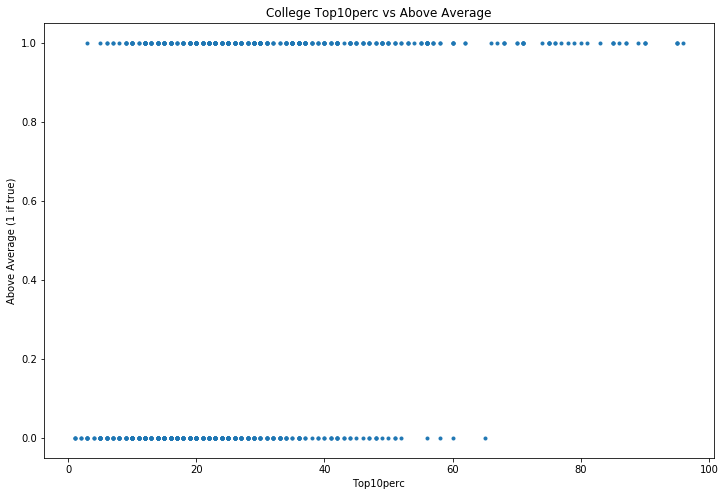

In [19]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(college.Top10perc,college.above_average,'.')
ax.set_title('College Top10perc vs Above Average')
ax.set_xlabel('Top10perc')
ax.set_ylabel('Above Average (1 if true)');

We can clearly see that the data forms two lines, one at the top for above average colleges and one at the bottom for the rest (as the outcome is binary, there should be no values in between).

Using this data, we want to find out at which value of `Top10perc` a college will start becoming 'above average' in terms of their graduation rate. 

Earlier we said that Logistic Regression is built upon <b>Linear Regression</b>, so our first step in understanding Logistic Regression is to build a Linear Regression model.

In [20]:
from sklearn.linear_model import LinearRegression


y=college.above_average
X=college[['Top10perc']]

lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

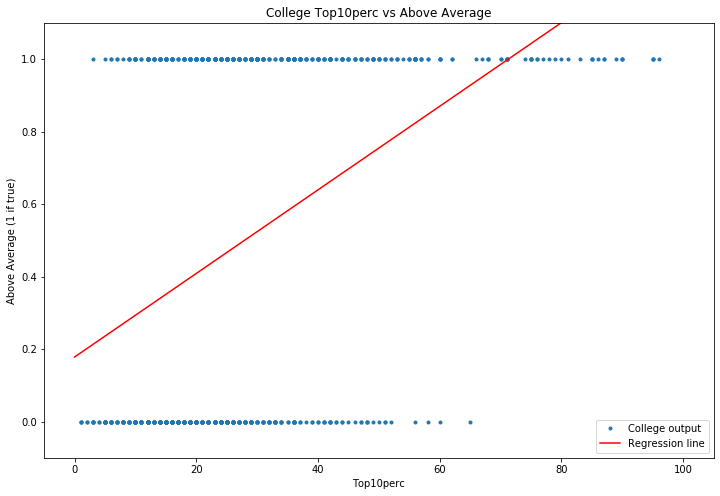

In [21]:
import numpy as np

fig,ax=plt.subplots(figsize=(12,8))
ax.plot(college.Top10perc,college.above_average,'.',label='College output')
ax.set_title('College Top10perc vs Above Average')
ax.set_xlabel('Top10perc')
ax.set_ylabel('Above Average (1 if true)')
ax.set_ylim(-0.1,1.1)
X_plot=np.linspace(0,100,200)
ax.plot(X_plot,X_plot*lr.coef_[0]+lr.intercept_,color='r',label='Regression line')
ax.legend();

In [22]:
print('Intercept: ' + str(lr.intercept_))
print('Coefficient: ' + str(lr.coef_[0]))

Intercept: 0.17793798290662027
Coefficient: 0.011536167317532361


Through building a Linear Regression model we can see the regression line that describes the pattern in the data, while this model is not a good fit for our data in itself, it does provide a useful insight- at what value of x (`Top10perc`) does the label change from `0` to `1`?

This happens when the trend line intercepts y=0.5 (the halfway point between the two labels).

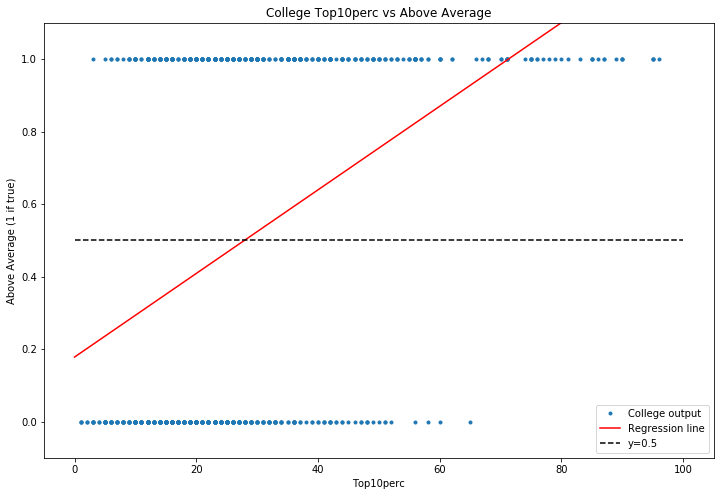

In [23]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(college.Top10perc,college.above_average,'.',label='College output')
ax.set_title('College Top10perc vs Above Average')
ax.set_xlabel('Top10perc')
ax.set_ylabel('Above Average (1 if true)')
ax.set_ylim(-0.1,1.1)
X_plot=np.linspace(0,100,200)
ax.plot(X_plot,X_plot*lr.coef_[0]+lr.intercept_,color='r',label='Regression line')
ax.plot(X_plot,[0.5 for p in range(len(X_plot))],color='black',linestyle='dashed',label='y=0.5')
ax.legend();

So, how do we find out what the value of `Top10perc` is when y=0.5?

Recall from the previous section that the formula for a linear regression is:

<p style=font-size:24pt>$\hat{y}$ = $\beta$$_0$ + $\beta$$_1$$x$$_1$</p> 

Where $\beta$$_0$ is the regression lines intercept and $\beta$$_1$ is the coefficient.

We can easily find out what $\beta$$_0$ and $\beta$$_1$ are from our model, therefore we can easily rewrite this formula to find the value of x (`Top10perc`) when y=0.5:

<p style=font-size:24pt>$x$ = $\frac{0.5 - \beta_0}{\beta_1}$ </p> 

Using the values from our model:

In [24]:
threshold_linear=(0.5-lr.intercept_)/lr.coef_[0]
print(threshold_linear)

27.91759240557463


According to our Linear Regression model, a college with more than 27.9% of their students coming from the top 10% of their high schools will be predicted as being above average.

Let's add this to our diagram:

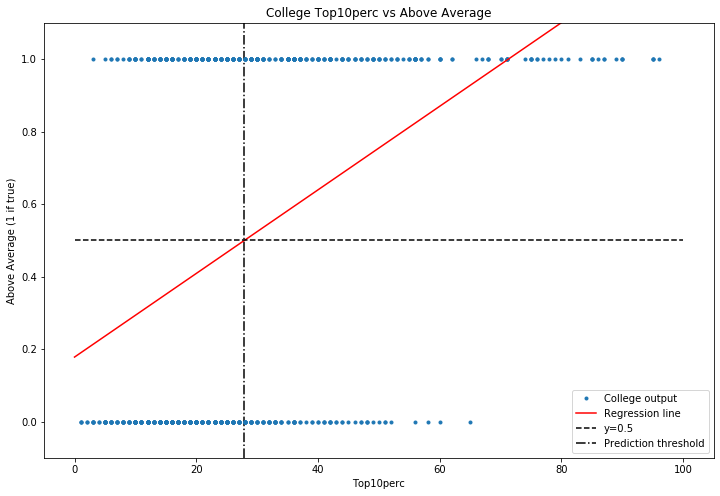

In [25]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(college.Top10perc,college.above_average,'.',label='College output')
ax.set_title('College Top10perc vs Above Average')
ax.set_xlabel('Top10perc')
ax.set_ylabel('Above Average (1 if true)')
ax.set_ylim(-0.1,1.1)
X_plot=np.linspace(0,100,200)
ax.plot(X_plot,X_plot*lr.coef_[0]+lr.intercept_,color='r',label='Regression line')
ax.plot(X_plot,[0.5 for p in range(len(X_plot))],color='black',linestyle='dashed',label='y=0.5')
ax.vlines(threshold_linear,ymin=-0.1,ymax=1.1,color='black',linestyle='dashdot',label='Prediction threshold')
ax.legend();

Anything to left of the line will be predicted as being below average, and anything to the right is above average. 

Now this isn't perfect. For the below average colleges we can see some have a `Top10perc` greater than 27.9% (these are called false positives, as they have incorrectly been assigned the positive label). Similarly, for the above average colleges, some have `Top10perc` lower than 27.9% (these are called false negatives). All models are likely to make errors, but using a straight line to calculate the threshold where predictions change is inefficient as it is inflexible. Instead, a curve would do a better job.

This is the basis of how Logistic Regression works, however, instead of using a straight line to decide where the change in prediction starts, it uses a <b>sigmoid curve</b>, which has the following formula:

<p style=font-size:24pt>$p(x)$ = $\frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}$</p> 

This might look scary, but don't worry (python does the calculations anyway). What it means is that the probability $p(x)$ of assigining a label of 1 to a data point is found using this formula. 

You may notice that contained within that formula is the equation for linear regression. This is why it is called Logistic <i>Regression</i> as the model will first perform regression analysis on the data, and then use the outputs to calculate the probability of each data point being assigned a label.

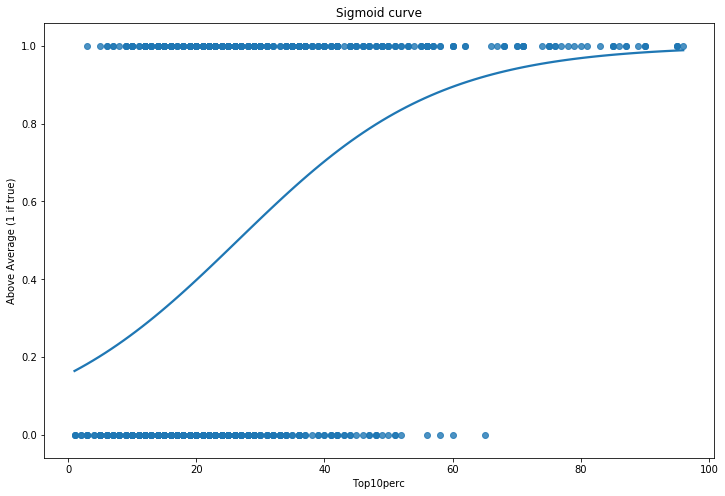

In [26]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(12,8))
sns.regplot(x=college.Top10perc, y=college.above_average, data=college, logistic=True, ci=None,ax=ax)
ax.set_title('Sigmoid curve')
ax.set_xlabel('Top10perc')
ax.set_ylabel('Above Average (1 if true)');

The sigmoid curve represents the <i>probabilities</i> of being assigned the label 1 (above average). The advantage of using a curve is that it will better follow the pattern in the data andbe less sensitive to outliers.

Let's see what value of `Top10perc` will result in Logistic Regression predicting a college as being above avarage. To work this out we will need to find where the sigmoid curve crosses the line y=0.5 (where $p(x)$=0.5). To do this we will need to rearrange this scary looking formula...

<p style=font-size:24pt>$0.5$ = $\frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}$</p> 

Happily, this simplifies nicely to:

<p style=font-size:24pt>$x$ = $\frac{-\beta_0}{\beta_1}$</p> 

Note, this time $\beta$$_0$ and $\beta$$_1$ are the intercept and coefficient from the logistic regression model:

In [27]:
threshold_logistic=-logreg.intercept_/logreg.coef_[0]
print(threshold_logistic[0])

26.33434276810473


Using a sigmoid curve, the threshold of `Top10perc` where the prediction changes is now 26.3%

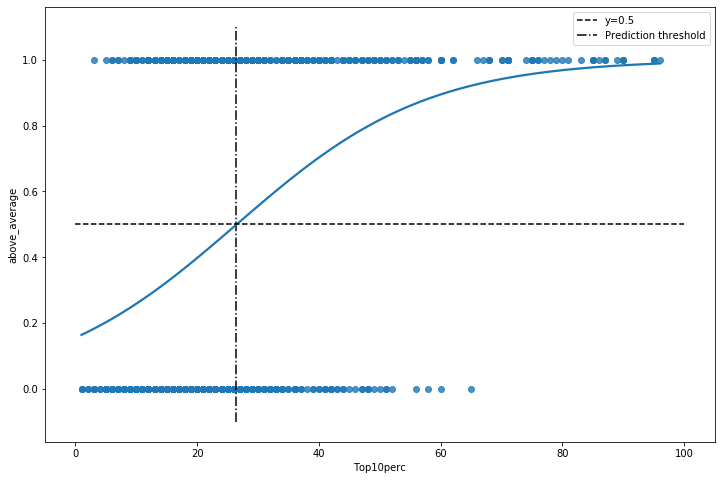

In [28]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(12,8))
sns.regplot(x=college.Top10perc, y=college.above_average, data=college, logistic=True, ci=None,ax=ax)
ax.plot(X_plot,[0.5 for p in range(len(X_plot))],color='black',linestyle='dashed',label='y=0.5')
ax.vlines(threshold_logistic[0],ymin=-0.1,ymax=1.1,color='black',linestyle='dashdot',label='Prediction threshold')
ax.legend();

Using a sigmoid curve as the basis for finding the threshold is less sensitive to outliers and follows the data more closely, making it a better fit for assigning data points to categories

So that is how Logistic Regression works, it uses a regression method combined with a sigmoid curve to determine the threshold where the prediction changes from 0 to 1. In this demonstration we only used one predictive feature, but it works exactly the same no matter how many features you use (although the calculations do become more complex).

In the workshop we will dive deeper into how we interpret and evaluate Logistic Regression models.